### 모델설명

층의 개수: 4개<br>
층1: input 노드 5개<br>
층2: hidden layer 노드 128개<br>
층3: hidden layer 노드 64개<br>
층4: output 노드 1개<br>
loss function: mse<br>
bias의 초기값 정하는 방식: zeros<br>
epoch: 12000<br>
상관계수:-0.934030

# 딥러닝으로 인덱스 도출

In [1]:
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense,Input
import pandas as pd
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import os

Using TensorFlow backend.


In [2]:
# 데이터 모두 합친 파일 가져오기 
filenames = os.listdir('../data/total2/')
filenames

['01_hagye1.csv',
 '02_sanggye2.csv',
 '03_gyonam.csv',
 '04_sanggye10.csv',
 '05_sanggye5.csv',
 '06_sanggye2.csv',
 '07_sanggye67.csv',
 '08_sanggye1.csv',
 '09_sanggye67.csv',
 '10_jongno1234.csv',
 '11_jongno1234.csv',
 '12_jongno1234.csv',
 '13_jongno1234.csv',
 '14_jongno1234.csv',
 '15_jongno1234.csv',
 '16_jongno1234.csv',
 '17_hagye1.csv',
 '18_sanggye2.csv',
 '19_gongneung1.csv',
 '20_gongneung1.csv',
 '21_gongneung2.csv',
 '22_wolgye3.csv',
 '23_junggye23.csv',
 '24_sanggye2.csv',
 '25_sanggye5.csv',
 '26_sanggye67.csv',
 '27_jongno1234.csv',
 '28_sanggye34.csv',
 '29_changsin1.csv',
 '30_buam.csv',
 '31_sajik.csv',
 '32_jongno1234.csv',
 '33_changsin1.csv',
 '34_wolgye1.csv',
 '35_changsin3.csv',
 '36_cheongunhyoja.csv',
 '37_pyeongchang.csv',
 '38_hyehwa.csv',
 '39_gahoe.csv',
 '40_jongno56.csv',
 '41_hyehwa.csv',
 '42_gongneung2.csv',
 '43_ihwa.csv',
 '44_jongno1234.csv',
 '45_gahoe.csv',
 '46_gahoe.csv',
 '47_jongno1234.csv',
 '48_sungin2.csv',
 '49_jongno1234.csv',
 '50

In [3]:
# 빈 리스트 만들기
totaldata2 = []

# for문 돌려서 각 파일 불러온 후 리스트에 append
for name in filenames:
    totaldata2.append(pd.read_csv('../data/total2/'+name))

# 최종적으로 concat
rawdata = pd.concat(totaldata2)
rawdata

,Date,search,pm10,pm25,COUNT_T,TMST,retail
0,20180507,0.04172,96.467,43.400,101.0,3805.420,1.273
1,20180510,0.04172,67.648,31.915,244.0,4258.262,1.216
2,20180511,0.04172,110.924,71.296,192.0,4276.178,1.306
3,20180512,0.04172,39.515,24.293,56.0,3445.193,1.229
4,20180513,0.06258,20.664,12.441,130.0,3258.588,1.382
5,20180514,0.06258,92.687,65.110,313.0,3981.379,1.282
6,20180515,0.06258,87.309,61.238,273.0,4193.862,1.516
7,20180516,0.06258,41.908,27.438,228.0,4019.172,1.233
8,20180517,0.06258,18.190,7.539,185.0,4000.379,1.253
9,20180518,0.06258,10.677,3.328,107.0,4224.568,1.327


In [4]:
# 정규화
rawdata = (rawdata-rawdata.mean())/rawdata.std()

In [5]:
# x_feature와 y_feature 값 설정 
x2 = rawdata[['pm10','pm25','COUNT_T','TMST','search']]
y2 =  rawdata['retail']
x_data2 = np.array(x2)
y_data2 = np.array(y2)
y_data2 = y_data2.reshape(-1, 1)
y_data2 = y_data2
x_data2 = x_data2

In [6]:
# session 클리어
K.clear_session()

In [7]:
# 딥러닝 모델 만들기
model2 = Sequential()
model2.add(Dense(input_dim=5, units=5, activation="relu"))
model2.add(Dense(units=128, activation="relu"))
model2.add(Dense(units=64, activation="relu"))
model2.add(Dense(1, activation="linear"))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
# 딥러닝 모델 요약
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 128)               768       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,119
Trainable params: 9,119
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 딥러닝 모델 학습
model2.compile(optimizer='adam', loss='mse')
model2.fit(x_data2,y_data2,batch_size=300, epochs=12000, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/12000
14404/14404 [==============================] - 2s 154us/step - loss: 0.6875
Epoch 2/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.4605
Epoch 3/12000
14404/14404 [==============================] - 0s 14us/step - loss: 0.4375
Epoch 4/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.4276
Epoch 5/12000
14404/14404 [==============================] - 0s 14us/step - loss: 0.4257
Epoch 6/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.4159
Epoch 7/12000
14404/14404 [==============================] - 0s 14us/step - loss: 0.4123
Epoch 8/12000
14404/14404 [==============================] - 0s 17us/step - loss: 0.4102
Epoch 9/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.4067
Epoch 10/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.4049
Epoch 11/12000
14404/14404 [==============================] 

14404/14404 [==============================] - 0s 15us/step - loss: 0.3007
Epoch 179/12000
14404/14404 [==============================] - 0s 18us/step - loss: 0.3007
Epoch 180/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.2999
Epoch 181/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.2996
Epoch 182/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.2985
Epoch 183/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.3025
Epoch 184/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.2986
Epoch 185/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.3019
Epoch 186/12000
14404/14404 [==============================] - 0s 14us/step - loss: 0.2983
Epoch 187/12000
14404/14404 [==============================] - 0s 17us/step - loss: 0.3139
Epoch 188/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.3003
Epoch 189/12000

14404/14404 [==============================] - 0s 18us/step - loss: 0.2542
Epoch 357/12000
14404/14404 [==============================] - 0s 17us/step - loss: 0.2526
Epoch 358/12000
14404/14404 [==============================] - 0s 17us/step - loss: 0.2513
Epoch 359/12000
14404/14404 [==============================] - 0s 18us/step - loss: 0.2575
Epoch 360/12000
14404/14404 [==============================] - 0s 17us/step - loss: 0.2533
Epoch 361/12000
14404/14404 [==============================] - 0s 20us/step - loss: 0.2568
Epoch 362/12000
14404/14404 [==============================] - 0s 18us/step - loss: 0.2536
Epoch 363/12000
14404/14404 [==============================] - 0s 17us/step - loss: 0.2578
Epoch 364/12000
14404/14404 [==============================] - 0s 17us/step - loss: 0.2514
Epoch 365/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.2509: 0s - loss: 0.25
Epoch 366/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.252

14404/14404 [==============================] - 0s 16us/step - loss: 0.2488
Epoch 536/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.2389
Epoch 537/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.2387
Epoch 538/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.2435
Epoch 539/12000
14404/14404 [==============================] - 0s 17us/step - loss: 0.2397
Epoch 540/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.2409
Epoch 541/12000
14404/14404 [==============================] - 0s 17us/step - loss: 0.2400
Epoch 542/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.2387
Epoch 543/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.2371
Epoch 544/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.2413
Epoch 545/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.2443
Epoch 546/12000

14404/14404 [==============================] - 0s 15us/step - loss: 0.2274
Epoch 714/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.2272
Epoch 715/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.2281
Epoch 716/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.2244
Epoch 717/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.2273
Epoch 718/12000
14404/14404 [==============================] - 0s 14us/step - loss: 0.2249
Epoch 719/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.2285
Epoch 720/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.2252
Epoch 721/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.2255
Epoch 722/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.2269
Epoch 723/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.2247
Epoch 724/12000

14404/14404 [==============================] - 0s 19us/step - loss: 0.2214
Epoch 892/12000
14404/14404 [==============================] - 0s 18us/step - loss: 0.2235
Epoch 893/12000
14404/14404 [==============================] - 0s 19us/step - loss: 0.2238
Epoch 894/12000
14404/14404 [==============================] - 0s 19us/step - loss: 0.2158
Epoch 895/12000
14404/14404 [==============================] - 0s 23us/step - loss: 0.2176
Epoch 896/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.2212
Epoch 897/12000
14404/14404 [==============================] - 0s 17us/step - loss: 0.2189
Epoch 898/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.2207
Epoch 899/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.2199
Epoch 900/12000
14404/14404 [==============================] - 0s 17us/step - loss: 0.2169
Epoch 901/12000
14404/14404 [==============================] - 0s 18us/step - loss: 0.2285
Epoch 902/12000

14404/14404 [==============================] - 0s 16us/step - loss: 0.2193
Epoch 1069/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.2149
Epoch 1070/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.2129
Epoch 1071/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.2182
Epoch 1072/12000
14404/14404 [==============================] - 0s 17us/step - loss: 0.2151
Epoch 1073/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.2129
Epoch 1074/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.2080
Epoch 1075/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.2244
Epoch 1076/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.2126
Epoch 1077/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.2095
Epoch 1078/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.2116
Epoch

14404/14404 [==============================] - 0s 15us/step - loss: 0.2081
Epoch 1245/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.2065
Epoch 1246/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.2114
Epoch 1247/12000
14404/14404 [==============================] - 0s 19us/step - loss: 0.2012
Epoch 1248/12000
14404/14404 [==============================] - ETA: 0s - loss: 0.204 - 0s 16us/step - loss: 0.2066
Epoch 1249/12000
14404/14404 [==============================] - 0s 18us/step - loss: 0.2025
Epoch 1250/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.2075
Epoch 1251/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.2073
Epoch 1252/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.2097
Epoch 1253/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.2024
Epoch 1254/12000
14404/14404 [==============================] - 0s 17us/s

14404/14404 [==============================] - 0s 15us/step - loss: 0.1990
Epoch 1422/12000
14404/14404 [==============================] - 0s 14us/step - loss: 0.1996
Epoch 1423/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.1973
Epoch 1424/12000
14404/14404 [==============================] - 0s 17us/step - loss: 0.1967
Epoch 1425/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.1969
Epoch 1426/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.1963
Epoch 1427/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.2027
Epoch 1428/12000
14404/14404 [==============================] - 0s 14us/step - loss: 0.2007
Epoch 1429/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.1997
Epoch 1430/12000
14404/14404 [==============================] - 0s 14us/step - loss: 0.1991
Epoch 1431/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.1959
Epoch

14404/14404 [==============================] - 0s 16us/step - loss: 0.1945
Epoch 1598/12000
14404/14404 [==============================] - 0s 17us/step - loss: 0.1942
Epoch 1599/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.1939
Epoch 1600/12000
14404/14404 [==============================] - 0s 17us/step - loss: 0.1945
Epoch 1601/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.1939
Epoch 1602/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.1943
Epoch 1603/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.1953
Epoch 1604/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.1979
Epoch 1605/12000
14404/14404 [==============================] - 0s 17us/step - loss: 0.1962
Epoch 1606/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.1922
Epoch 1607/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.1964
Epoch

14404/14404 [==============================] - 0s 11us/step - loss: 0.1886
Epoch 1775/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1861
Epoch 1776/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1905
Epoch 1777/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1914
Epoch 1778/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1869
Epoch 1779/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1887
Epoch 1780/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1949
Epoch 1781/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1903
Epoch 1782/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1916
Epoch 1783/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1915
Epoch 1784/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1879
Epoch

14404/14404 [==============================] - 0s 10us/step - loss: 0.1853
Epoch 1864/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1895
Epoch 1865/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1904
Epoch 1866/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1968
Epoch 1867/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1901
Epoch 1868/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1836
Epoch 1869/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.2966
Epoch 1870/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.2137
Epoch 1871/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.2253
Epoch 1872/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1916
Epoch 1873/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1872
Epoch

14404/14404 [==============================] - 0s 10us/step - loss: 0.1822
Epoch 2042/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1817
Epoch 2043/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1836
Epoch 2044/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1833
Epoch 2045/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1887
Epoch 2046/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1861
Epoch 2047/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1845
Epoch 2048/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1821
Epoch 2049/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.2025
Epoch 2050/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1834
Epoch 2051/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1934
Epoch

14404/14404 [==============================] - 0s 12us/step - loss: 0.1901
Epoch 2219/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.2001
Epoch 2220/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1862
Epoch 2221/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1889
Epoch 2222/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1853
Epoch 2223/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1860
Epoch 2224/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1791
Epoch 2225/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1827
Epoch 2226/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1787
Epoch 2227/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1776
Epoch 2228/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1799
Epoch

14404/14404 [==============================] - 0s 11us/step - loss: 0.1901
Epoch 2397/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.2006
Epoch 2398/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1781
Epoch 2399/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1770
Epoch 2400/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1743
Epoch 2401/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1851
Epoch 2402/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1871
Epoch 2403/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1832
Epoch 2404/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1824
Epoch 2405/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1778
Epoch 2406/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1874
Epoch

14404/14404 [==============================] - 0s 11us/step - loss: 0.1795
Epoch 2573/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1824
Epoch 2574/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1752
Epoch 2575/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1729
Epoch 2576/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1806
Epoch 2577/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1733
Epoch 2578/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1748
Epoch 2579/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1845
Epoch 2580/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1751
Epoch 2581/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1788
Epoch 2582/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1741
Epoch

Epoch 2750/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1717
Epoch 2751/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1731
Epoch 2752/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1969
Epoch 2753/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1869
Epoch 2754/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1739
Epoch 2755/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1731
Epoch 2756/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1713
Epoch 2757/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1803
Epoch 2758/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1835
Epoch 2759/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1752
Epoch 2760/12000
14404/14404 [==============================] - 0s 10us/step - lo

14404/14404 [==============================] - 0s 10us/step - loss: 0.1832
Epoch 2840/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1730
Epoch 2841/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1683
Epoch 2842/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1732
Epoch 2843/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1722
Epoch 2844/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1774
Epoch 2845/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1807
Epoch 2846/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1695
Epoch 2847/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1710
Epoch 2848/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1705
Epoch 2849/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1768
Epoch

14404/14404 [==============================] - 0s 12us/step - loss: 0.1681
Epoch 3018/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1745
Epoch 3019/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1676
Epoch 3020/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1681
Epoch 3021/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1754
Epoch 3022/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1704
Epoch 3023/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.2375
Epoch 3024/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1836
Epoch 3025/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1792
Epoch 3026/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1819
Epoch 3027/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1696
Epoch

14404/14404 [==============================] - 0s 10us/step - loss: 0.1649
Epoch 3196/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1729
Epoch 3197/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1659
Epoch 3198/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1697
Epoch 3199/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1644
Epoch 3200/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1640
Epoch 3201/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1748
Epoch 3202/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1654
Epoch 3203/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1689
Epoch 3204/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1795
Epoch 3205/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1771
Epoch

Epoch 3284/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1792
Epoch 3285/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1981
Epoch 3286/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1684
Epoch 3287/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1843
Epoch 3288/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1676
Epoch 3289/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1645
Epoch 3290/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1673
Epoch 3291/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1611
Epoch 3292/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1686
Epoch 3293/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1665
Epoch 3294/12000
14404/14404 [==============================] - 0s 11us/step - l

14404/14404 [==============================] - 0s 11us/step - loss: 0.1775
Epoch 3462/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1692
Epoch 3463/12000
14404/14404 [==============================] - 0s 14us/step - loss: 0.1716
Epoch 3464/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1628
Epoch 3465/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1643
Epoch 3466/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1642
Epoch 3467/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1684
Epoch 3468/12000
14404/14404 [==============================] - 0s 14us/step - loss: 0.1800
Epoch 3469/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.1660
Epoch 3470/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1833
Epoch 3471/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1694
Epoch

14404/14404 [==============================] - 0s 12us/step - loss: 0.1688
Epoch 3639/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1650
Epoch 3640/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1657
Epoch 3641/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1608
Epoch 3642/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1656
Epoch 3643/12000
14404/14404 [==============================] - 0s 14us/step - loss: 0.1588
Epoch 3644/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1604
Epoch 3645/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1612
Epoch 3646/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1634
Epoch 3647/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1629
Epoch 3648/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1757
Epoch

14404/14404 [==============================] - 0s 13us/step - loss: 0.1653
Epoch 3816/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1669
Epoch 3817/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1600
Epoch 3818/12000
14404/14404 [==============================] - 0s 14us/step - loss: 0.1625
Epoch 3819/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1707
Epoch 3820/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1642
Epoch 3821/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1589
Epoch 3822/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1614
Epoch 3823/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1611
Epoch 3824/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1654
Epoch 3825/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1587
Epoch

14404/14404 [==============================] - 0s 13us/step - loss: 0.1566
Epoch 3993/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1705
Epoch 3994/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1582
Epoch 3995/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1632
Epoch 3996/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1650
Epoch 3997/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1565: 0s - loss: 0.1
Epoch 3998/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1592
Epoch 3999/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1664
Epoch 4000/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1639
Epoch 4001/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1620
Epoch 4002/12000
14404/14404 [==============================] - 0s 13us/step - lo

14404/14404 [==============================] - 0s 11us/step - loss: 0.1549
Epoch 4082/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1571
Epoch 4083/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1559
Epoch 4084/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1577
Epoch 4085/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1638
Epoch 4086/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1574
Epoch 4087/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1574
Epoch 4088/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1563
Epoch 4089/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1663
Epoch 4090/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1606
Epoch 4091/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1663
Epoch

14404/14404 [==============================] - 0s 12us/step - loss: 0.1801
Epoch 4171/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1639
Epoch 4172/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1656
Epoch 4173/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1592
Epoch 4174/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1775
Epoch 4175/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1660
Epoch 4176/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1561
Epoch 4177/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1587
Epoch 4178/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1609
Epoch 4179/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1853
Epoch 4180/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1847
Epoch

Epoch 4347/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1559
Epoch 4348/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1548
Epoch 4349/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1591
Epoch 4350/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1628
Epoch 4351/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1646
Epoch 4352/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1612
Epoch 4353/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1584
Epoch 4354/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1549
Epoch 4355/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1666
Epoch 4356/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1600
Epoch 4357/12000
14404/14404 [==============================] - 0s 12us/step - l

14404/14404 [==============================] - 0s 12us/step - loss: 0.1610
Epoch 4437/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.1617
Epoch 4438/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1592
Epoch 4439/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1564
Epoch 4440/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1532
Epoch 4441/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1587
Epoch 4442/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1639
Epoch 4443/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1527
Epoch 4444/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1550
Epoch 4445/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1531
Epoch 4446/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1594
Epoch

14404/14404 [==============================] - 0s 10us/step - loss: 0.1514
Epoch 4615/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1541
Epoch 4616/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1550
Epoch 4617/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1526
Epoch 4618/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1572
Epoch 4619/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1676
Epoch 4620/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1564
Epoch 4621/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1535
Epoch 4622/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1556
Epoch 4623/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1543
Epoch 4624/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1544
Epoch 4

14404/14404 [==============================] - 0s 10us/step - loss: 0.1586
Epoch 4793/12000
14404/14404 [==============================] - 0s 14us/step - loss: 0.1668
Epoch 4794/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1561
Epoch 4795/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1539
Epoch 4796/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1535
Epoch 4797/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1575
Epoch 4798/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1520
Epoch 4799/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1526
Epoch 4800/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1552
Epoch 4801/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1582
Epoch 4802/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1625
Epoch

Epoch 4881/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1586
Epoch 4882/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1568
Epoch 4883/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1546
Epoch 4884/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1502
Epoch 4885/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1510
Epoch 4886/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.2108
Epoch 4887/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1818
Epoch 4888/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1825
Epoch 4889/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1555
Epoch 4890/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1509
Epoch 4891/12000
14404/14404 [==============================] - 0s 10us/step - l

14404/14404 [==============================] - 0s 11us/step - loss: 0.1648
Epoch 4971/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1712
Epoch 4972/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1526
Epoch 4973/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1697
Epoch 4974/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1615
Epoch 4975/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1988
Epoch 4976/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1552
Epoch 4977/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1533
Epoch 4978/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1543
Epoch 4979/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1609
Epoch 4980/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1519
Epoch

Epoch 5148/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1503
Epoch 5149/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1505
Epoch 5150/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1488
Epoch 5151/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1522
Epoch 5152/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1520
Epoch 5153/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1508
Epoch 5154/12000
14404/14404 [==============================] - 0s 29us/step - loss: 0.1552
Epoch 5155/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.1550: 0s - loss: 0.
Epoch 5156/12000
14404/14404 [==============================] - 0s 15us/step - loss: 0.1549
Epoch 5157/12000
14404/14404 [==============================] - 0s 18us/step - loss: 0.1504
Epoch 5158/12000
14404/14404 [==============================] - 0

14404/14404 [==============================] - 0s 10us/step - loss: 0.1504
Epoch 5326/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1510
Epoch 5327/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1484
Epoch 5328/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1783
Epoch 5329/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1542
Epoch 5330/12000
14404/14404 [==============================] - 0s 14us/step - loss: 0.1624
Epoch 5331/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1529
Epoch 5332/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1496
Epoch 5333/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1604
Epoch 5334/12000
14404/14404 [==============================] - 0s 14us/step - loss: 0.1710
Epoch 5335/12000
14404/14404 [==============================] - 0s 14us/step - loss: 0.1514
Epoch

14404/14404 [==============================] - 0s 12us/step - loss: 0.1470
Epoch 5504/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1627
Epoch 5505/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1493
Epoch 5506/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1545
Epoch 5507/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1579
Epoch 5508/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1600
Epoch 5509/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1479
Epoch 5510/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1948
Epoch 5511/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1627
Epoch 5512/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1599
Epoch 5513/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1590
Epoch

14404/14404 [==============================] - 0s 12us/step - loss: 0.1526
Epoch 5682/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1609
Epoch 5683/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1625
Epoch 5684/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1464
Epoch 5685/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1745
Epoch 5686/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1489
Epoch 5687/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1686
Epoch 5688/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1847
Epoch 5689/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1535
Epoch 5690/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1520
Epoch 5691/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1532: 0s -

14404/14404 [==============================] - 0s 10us/step - loss: 0.1492
Epoch 5771/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1458
Epoch 5772/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1507
Epoch 5773/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.2154
Epoch 5774/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1537
Epoch 5775/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.2067
Epoch 5776/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1649
Epoch 5777/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1513
Epoch 5778/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1528
Epoch 5779/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1525
Epoch 5780/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1457
Epoch

14404/14404 [==============================] - 0s 12us/step - loss: 0.1500
Epoch 5948/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1454
Epoch 5949/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1478
Epoch 5950/12000
14404/14404 [==============================] - 0s 14us/step - loss: 0.1554
Epoch 5951/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1547
Epoch 5952/12000
14404/14404 [==============================] - ETA: 0s - loss: 0.148 - 0s 12us/step - loss: 0.1489
Epoch 5953/12000
14404/14404 [==============================] - 0s 14us/step - loss: 0.1508
Epoch 5954/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1501
Epoch 5955/12000
14404/14404 [==============================] - 0s 13us/step - loss: 0.1461
Epoch 5956/12000
14404/14404 [==============================] - 0s 16us/step - loss: 0.1457
Epoch 5957/12000
14404/14404 [==============================] - 0s 10us/s

Epoch 6124/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1441
Epoch 6125/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1604
Epoch 6126/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1455
Epoch 6127/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1475
Epoch 6128/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1537
Epoch 6129/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1567
Epoch 6130/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1514
Epoch 6131/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1567
Epoch 6132/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1487
Epoch 6133/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1485
Epoch 6134/12000
14404/14404 [==============================] - 0s 11us/step - l

14404/14404 [==============================] - 0s 10us/step - loss: 0.1429
Epoch 6214/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1519
Epoch 6215/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1479
Epoch 6216/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1434
Epoch 6217/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1507
Epoch 6218/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1594
Epoch 6219/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1528
Epoch 6220/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1503
Epoch 6221/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1512
Epoch 6222/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1498
Epoch 6223/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1536
Epoch

14404/14404 [==============================] - 0s 11us/step - loss: 0.1485
Epoch 6392/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1445
Epoch 6393/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1449
Epoch 6394/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1420
Epoch 6395/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1525
Epoch 6396/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1495
Epoch 6397/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1464
Epoch 6398/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1664
Epoch 6399/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1480
Epoch 6400/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1463
Epoch 6401/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1469
Epoch

14404/14404 [==============================] - 0s 12us/step - loss: 0.1427
Epoch 6570/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1423
Epoch 6571/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1423
Epoch 6572/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1448
Epoch 6573/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1444
Epoch 6574/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1422
Epoch 6575/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1424
Epoch 6576/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1523
Epoch 6577/12000
14404/14404 [==============================] - 0s 18us/step - loss: 0.1843
Epoch 6578/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1485
Epoch 6579/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1641
Epoch

14404/14404 [==============================] - 0s 10us/step - loss: 0.1448
Epoch 6746/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1424
Epoch 6747/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1404
Epoch 6748/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1423
Epoch 6749/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1531
Epoch 6750/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1444
Epoch 6751/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1557
Epoch 6752/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1536
Epoch 6753/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1490
Epoch 6754/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1550
Epoch 6755/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1521
Epoch

14404/14404 [==============================] - 0s 10us/step - loss: 0.1431
Epoch 6924/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1421
Epoch 6925/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1411
Epoch 6926/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1740
Epoch 6927/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1567
Epoch 6928/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1493
Epoch 6929/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1461
Epoch 6930/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1583
Epoch 6931/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1570
Epoch 6932/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1527
Epoch 6933/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1416
Epoch

14404/14404 [==============================] - 0s 11us/step - loss: 0.1433
Epoch 7102/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1403
Epoch 7103/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1533
Epoch 7104/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1398
Epoch 7105/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1433
Epoch 7106/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1421
Epoch 7107/12000
14404/14404 [==============================] - 0s 14us/step - loss: 0.1409
Epoch 7108/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1609
Epoch 7109/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1414
Epoch 7110/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1421
Epoch 7111/12000
14404/14404 [==============================] - 0s 14us/step - loss: 0.1444
Epoch

14404/14404 [==============================] - 0s 11us/step - loss: 0.1388
Epoch 7280/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1380
Epoch 7281/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1394
Epoch 7282/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1418
Epoch 7283/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1415
Epoch 7284/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1753
Epoch 7285/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1480
Epoch 7286/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1639
Epoch 7287/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1437
Epoch 7288/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1737
Epoch 7289/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1632
Epoch

14404/14404 [==============================] - 0s 11us/step - loss: 0.1487
Epoch 7458/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1390
Epoch 7459/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1452
Epoch 7460/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1635
Epoch 7461/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1414
Epoch 7462/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1367
Epoch 7463/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1580
Epoch 7464/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1392
Epoch 7465/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1653
Epoch 7466/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1428
Epoch 7467/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1710
Epoch

14404/14404 [==============================] - 0s 11us/step - loss: 0.1482
Epoch 7636/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1422
Epoch 7637/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1437
Epoch 7638/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1392
Epoch 7639/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1405
Epoch 7640/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1413
Epoch 7641/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1437
Epoch 7642/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1381
Epoch 7643/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1404
Epoch 7644/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1440
Epoch 7645/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1560
Epoch

14404/14404 [==============================] - 0s 9us/step - loss: 0.1453
Epoch 7814/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1417
Epoch 7815/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1400
Epoch 7816/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1541
Epoch 7817/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1421
Epoch 7818/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1492
Epoch 7819/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1744
Epoch 7820/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1497
Epoch 7821/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1572
Epoch 7822/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1451
Epoch 7823/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1382
Epoch 

14404/14404 [==============================] - 0s 10us/step - loss: 0.1395
Epoch 7992/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1489
Epoch 7993/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.2045
Epoch 7994/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1577
Epoch 7995/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1399
Epoch 7996/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1661
Epoch 7997/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1406
Epoch 7998/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1388
Epoch 7999/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1618
Epoch 8000/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1482
Epoch 8001/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1420
Epoch

14404/14404 [==============================] - 0s 10us/step - loss: 0.1409
Epoch 8170/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1361
Epoch 8171/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1367
Epoch 8172/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1421
Epoch 8173/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1421
Epoch 8174/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1378
Epoch 8175/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1540
Epoch 8176/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1576
Epoch 8177/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1391
Epoch 8178/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1451
Epoch 8179/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1374
Epoch

14404/14404 [==============================] - 0s 10us/step - loss: 0.1396
Epoch 8348/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1370
Epoch 8349/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1456
Epoch 8350/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1394
Epoch 8351/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1462
Epoch 8352/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1387
Epoch 8353/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1473
Epoch 8354/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1588
Epoch 8355/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1502
Epoch 8356/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1353
Epoch 8357/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1356
Epoch

Epoch 8436/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1497
Epoch 8437/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1354
Epoch 8438/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1410
Epoch 8439/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1369
Epoch 8440/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1454
Epoch 8441/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1363
Epoch 8442/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1350
Epoch 8443/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1367
Epoch 8444/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1351
Epoch 8445/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1527
Epoch 8446/12000
14404/14404 [==============================] - 0s 10us/step - l

14404/14404 [==============================] - 0s 10us/step - loss: 0.1534
Epoch 8615/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1368
Epoch 8616/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1357
Epoch 8617/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1369
Epoch 8618/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1364
Epoch 8619/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1412
Epoch 8620/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1373
Epoch 8621/12000
14404/14404 [==============================] - 0s 8us/step - loss: 0.1385
Epoch 8622/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1353
Epoch 8623/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1372
Epoch 8624/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1433
Epoch 8625/120

14404/14404 [==============================] - 0s 9us/step - loss: 0.1419
Epoch 8793/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1439
Epoch 8794/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1423
Epoch 8795/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1342
Epoch 8796/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1384
Epoch 8797/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1687
Epoch 8798/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1525
Epoch 8799/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1374
Epoch 8800/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1360
Epoch 8801/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1413
Epoch 8802/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1471
Epoch 8803/1

14404/14404 [==============================] - 0s 9us/step - loss: 0.1455
Epoch 8882/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1362
Epoch 8883/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1386
Epoch 8884/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1502
Epoch 8885/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1340
Epoch 8886/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1365
Epoch 8887/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1412
Epoch 8888/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1874
Epoch 8889/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1540
Epoch 8890/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1342
Epoch 8891/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1422
Epoch 8892/120

14404/14404 [==============================] - 0s 9us/step - loss: 0.1402
Epoch 9060/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1452
Epoch 9061/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1494
Epoch 9062/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1359
Epoch 9063/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1480
Epoch 9064/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1444
Epoch 9065/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1468
Epoch 9066/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1512
Epoch 9067/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1447
Epoch 9068/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1383
Epoch 9069/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1360A: 0s - loss: 0.

14404/14404 [==============================] - 0s 10us/step - loss: 0.1526
Epoch 9238/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1420
Epoch 9239/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1502
Epoch 9240/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1454
Epoch 9241/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1393
Epoch 9242/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1406
Epoch 9243/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1341
Epoch 9244/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1355
Epoch 9245/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1532
Epoch 9246/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1369
Epoch 9247/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1432
Epoch 

14404/14404 [==============================] - 0s 8us/step - loss: 0.1321
Epoch 9416/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1407
Epoch 9417/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1346
Epoch 9418/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1364
Epoch 9419/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1344
Epoch 9420/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1337
Epoch 9421/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1315
Epoch 9422/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1525
Epoch 9423/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1632
Epoch 9424/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1367
Epoch 9425/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1316
Epoch 9426/1

14404/14404 [==============================] - 0s 9us/step - loss: 0.1430
Epoch 9594/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1326
Epoch 9595/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1351
Epoch 9596/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1346
Epoch 9597/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1332
Epoch 9598/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1413
Epoch 9599/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1335
Epoch 9600/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1325
Epoch 9601/12000
14404/14404 [==============================] - 0s 8us/step - loss: 0.1489
Epoch 9602/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1377
Epoch 9603/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1380
Epoch 96

14404/14404 [==============================] - 0s 9us/step - loss: 0.1365
Epoch 9773/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1355
Epoch 9774/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1518
Epoch 9775/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1316
Epoch 9776/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1378
Epoch 9777/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1480
Epoch 9778/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1385
Epoch 9779/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1310
Epoch 9780/12000
14404/14404 [==============================] - 0s 8us/step - loss: 0.1368
Epoch 9781/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1338
Epoch 9782/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1316
Epoch 9783/12

14404/14404 [==============================] - 0s 9us/step - loss: 0.1558
Epoch 9952/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1345
Epoch 9953/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1340
Epoch 9954/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1815
Epoch 9955/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1556
Epoch 9956/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1407
Epoch 9957/12000
14404/14404 [==============================] - 0s 8us/step - loss: 0.1334
Epoch 9958/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1397
Epoch 9959/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1382
Epoch 9960/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1364
Epoch 9961/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1423
Epoch 9962/12000

Epoch 10129/12000
14404/14404 [==============================] - 0s 8us/step - loss: 0.1435
Epoch 10130/12000
14404/14404 [==============================] - 0s 8us/step - loss: 0.1366
Epoch 10131/12000
14404/14404 [==============================] - 0s 8us/step - loss: 0.1340
Epoch 10132/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1383
Epoch 10133/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1341
Epoch 10134/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1391
Epoch 10135/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1431
Epoch 10136/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1595
Epoch 10137/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1513
Epoch 10138/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2352
Epoch 10139/12000
14404/14404 [==============================] - 0s 10us/step -

14404/14404 [==============================] - 0s 11us/step - loss: 0.1555
Epoch 10306/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1318
Epoch 10307/12000
14404/14404 [==============================] - 0s 8us/step - loss: 0.1414
Epoch 10308/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1432
Epoch 10309/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1328
Epoch 10310/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1302A: 0s - loss: 0.130
Epoch 10311/12000
14404/14404 [==============================] - 0s 8us/step - loss: 0.1343
Epoch 10312/12000
14404/14404 [==============================] - 0s 8us/step - loss: 0.1541
Epoch 10313/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1365
Epoch 10314/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1358
Epoch 10315/12000
14404/14404 [==============================] - 0s 10us/s

Epoch 10482/12000
14404/14404 [==============================] - 0s 8us/step - loss: 0.1420
Epoch 10483/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1311
Epoch 10484/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1362
Epoch 10485/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1301
Epoch 10486/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1325
Epoch 10487/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1441
Epoch 10488/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1589
Epoch 10489/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1405
Epoch 10490/12000
14404/14404 [==============================] - 0s 8us/step - loss: 0.1359
Epoch 10491/12000
14404/14404 [==============================] - 0s 8us/step - loss: 0.1497
Epoch 10492/12000
14404/14404 [==============================] - 0s 10us/step - 

14404/14404 [==============================] - 0s 9us/step - loss: 0.1286
Epoch 10659/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1286A: 0s - loss: 0.130
Epoch 10660/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1342
Epoch 10661/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1388
Epoch 10662/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1340
Epoch 10663/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1325: 0s - loss: 0.129
Epoch 10664/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1284
Epoch 10665/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1402
Epoch 10666/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1309
Epoch 10667/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1370
Epoch 10668/12000
14404/14404 [=============================

14404/14404 [==============================] - 0s 10us/step - loss: 0.1306
Epoch 10834/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1300
Epoch 10835/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1478
Epoch 10836/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1290
Epoch 10837/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1336
Epoch 10838/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1353
Epoch 10839/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1406
Epoch 10840/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1359
Epoch 10841/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.1378
Epoch 10842/12000
14404/14404 [==============================] - 0s 12us/step - loss: 0.1325
Epoch 10843/12000
14404/14404 [==============================] - 0s 11us/step - loss: 0.

Epoch 10921/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1300
Epoch 10922/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1334
Epoch 10923/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1408
Epoch 10924/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1365
Epoch 10925/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1339
Epoch 10926/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1297
Epoch 10927/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1297
Epoch 10928/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1619
Epoch 10929/12000
14404/14404 [==============================] - 0s 8us/step - loss: 0.1380
Epoch 10930/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1347
Epoch 10931/12000
14404/14404 [==============================] - 0s 8us/step - l

14404/14404 [==============================] - 0s 9us/step - loss: 0.1519
Epoch 11098/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1713
Epoch 11099/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1401
Epoch 11100/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1370
Epoch 11101/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1317
Epoch 11102/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1364
Epoch 11103/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1416
Epoch 11104/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1340
Epoch 11105/12000
14404/14404 [==============================] - 0s 8us/step - loss: 0.1360
Epoch 11106/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1394
Epoch 11107/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1294
Epoc

14404/14404 [==============================] - 0s 9us/step - loss: 0.1293
Epoch 11274/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1342
Epoch 11275/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1314
Epoch 11276/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1401
Epoch 11277/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1333
Epoch 11278/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1328
Epoch 11279/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1622
Epoch 11280/12000
14404/14404 [==============================] - 0s 8us/step - loss: 0.1468
Epoch 11281/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1453
Epoch 11282/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1311
Epoch 11283/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1306
Epoc

14404/14404 [==============================] - 0s 9us/step - loss: 0.1353
Epoch 11450/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1313
Epoch 11451/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1261
Epoch 11452/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1282
Epoch 11453/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1513
Epoch 11454/12000
14404/14404 [==============================] - 0s 8us/step - loss: 0.1365
Epoch 11455/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1302
Epoch 11456/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1472
Epoch 11457/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1364
Epoch 11458/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1371
Epoch 11459/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1339
Epo

14404/14404 [==============================] - 0s 9us/step - loss: 0.1280
Epoch 11626/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1322
Epoch 11627/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1277
Epoch 11628/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1345
Epoch 11629/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1294
Epoch 11630/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1438
Epoch 11631/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1342
Epoch 11632/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1572
Epoch 11633/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1442
Epoch 11634/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1466
Epoch 11635/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1295
Epoch

14404/14404 [==============================] - 0s 9us/step - loss: 0.1617
Epoch 11803/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1379
Epoch 11804/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1367
Epoch 11805/12000
14404/14404 [==============================] - 0s 8us/step - loss: 0.1349
Epoch 11806/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1284
Epoch 11807/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1374
Epoch 11808/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1328
Epoch 11809/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1316
Epoch 11810/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1370
Epoch 11811/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1342
Epoch 11812/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1403
Epoc

14404/14404 [==============================] - 0s 9us/step - loss: 0.1376
Epoch 11979/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1300
Epoch 11980/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1281
Epoch 11981/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1355
Epoch 11982/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1266
Epoch 11983/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1403
Epoch 11984/12000
14404/14404 [==============================] - 0s 10us/step - loss: 0.1285
Epoch 11985/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1379
Epoch 11986/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1324
Epoch 11987/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1429
Epoch 11988/12000
14404/14404 [==============================] - 0s 9us/step - loss: 0.1317
Epoch

In [10]:
# 딥러닝 모델로 인덱스 도출
model2.predict(x_data2)

array([[ 0.20963627],
       [-0.09210187],
       [ 0.22863626],
       ...,
       [-0.1477285 ],
       [-0.3022173 ],
       [-0.7393134 ]], dtype=float32)

In [11]:
rawdata['Deepindex'] = model2.predict(x_data2)

In [12]:
rawdata1 = rawdata[['pm10','pm25','COUNT_T','TMST','search','retail','Deepindex']]
rawdata1

,pm10,pm25,COUNT_T,TMST,search,retail,Deepindex
0,1.067992,0.426393,-0.634053,-0.587751,0.151292,0.157128,0.209636
1,0.317234,-0.005862,0.324030,-0.539979,0.151292,0.014601,-0.092102
2,1.444609,1.476300,-0.024364,-0.538089,0.151292,0.239643,0.228636
3,-0.415653,-0.292727,-0.935547,-0.625753,0.151292,0.047107,0.312091
4,-0.906737,-0.738795,-0.439756,-0.645439,0.627826,0.429678,-0.095086
5,0.969520,1.243480,0.786321,-0.569189,0.627826,0.179632,0.589249
6,0.829419,1.097752,0.518326,-0.546773,0.627826,0.764741,0.404607
7,-0.353313,-0.174361,0.216832,-0.565202,0.627826,0.057109,-0.031194
8,-0.971186,-0.923289,-0.071263,-0.567184,0.627826,0.107118,-0.060940
9,-1.166906,-1.081776,-0.593854,-0.543533,0.627826,0.292153,-0.256364


In [14]:
# 직관적 분석을 위해 (-1) 곱하기 : 미세먼지와 인덱스를 양의 상관관계로 만드는 작업
rawdata1['Deepindex'] = rawdata1['Deepindex'] * (-1)
rawdata1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,pm10,pm25,COUNT_T,TMST,search,retail,Deepindex
0,1.067992,0.426393,-0.634053,-0.587751,0.151292,0.157128,-0.209636
1,0.317234,-0.005862,0.324030,-0.539979,0.151292,0.014601,0.092102
2,1.444609,1.476300,-0.024364,-0.538089,0.151292,0.239643,-0.228636
3,-0.415653,-0.292727,-0.935547,-0.625753,0.151292,0.047107,-0.312091
4,-0.906737,-0.738795,-0.439756,-0.645439,0.627826,0.429678,0.095086
5,0.969520,1.243480,0.786321,-0.569189,0.627826,0.179632,-0.589249
6,0.829419,1.097752,0.518326,-0.546773,0.627826,0.764741,-0.404607
7,-0.353313,-0.174361,0.216832,-0.565202,0.627826,0.057109,0.031194
8,-0.971186,-0.923289,-0.071263,-0.567184,0.627826,0.107118,0.060940
9,-1.166906,-1.081776,-0.593854,-0.543533,0.627826,0.292153,0.256364


In [15]:
# 상관계수 구하기
rawdata1.corr()

,pm10,pm25,COUNT_T,TMST,search,retail,Deepindex
pm10,1.000000,0.942492,0.601118,-0.067030,0.389581,-0.119640,0.107835
pm25,0.942492,1.000000,0.561144,-0.049735,0.403678,-0.095586,0.089539
COUNT_T,0.601118,0.561144,1.000000,0.045397,0.526621,-0.111842,0.109405
TMST,-0.067030,-0.049735,0.045397,1.000000,-0.162895,0.738820,-0.786997
search,0.389581,0.403678,0.526621,-0.162895,1.000000,-0.266636,0.311544
retail,-0.119640,-0.095586,-0.111842,0.738820,-0.266636,1.000000,-0.934030
Deepindex,0.107835,0.089539,0.109405,-0.786997,0.311544,-0.934030,1.000000


In [16]:
# 상관계수 구하기
cor = rawdata1.corr()
cor

,pm10,pm25,COUNT_T,TMST,search,retail,Deepindex
pm10,1.000000,0.942492,0.601118,-0.067030,0.389581,-0.119640,0.107835
pm25,0.942492,1.000000,0.561144,-0.049735,0.403678,-0.095586,0.089539
COUNT_T,0.601118,0.561144,1.000000,0.045397,0.526621,-0.111842,0.109405
TMST,-0.067030,-0.049735,0.045397,1.000000,-0.162895,0.738820,-0.786997
search,0.389581,0.403678,0.526621,-0.162895,1.000000,-0.266636,0.311544
retail,-0.119640,-0.095586,-0.111842,0.738820,-0.266636,1.000000,-0.934030
Deepindex,0.107835,0.089539,0.109405,-0.786997,0.311544,-0.934030,1.000000


In [18]:
# 시각화 준비
import seaborn as sns
sns.set()

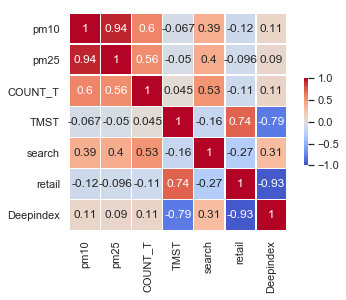

In [19]:
# 히트맵을 통한 상관계수 시각화
heatmap = sns.heatmap(cor, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

In [20]:
rawdata1.to_csv('../data/rawdataNew.csv', index=False)

# 시각화 작업

### 유통 매출지수와의 상관관계

In [21]:
# 시각화 준비
import seaborn as sns
from matplotlib import pyplot as plt

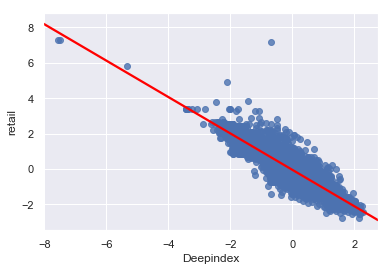

In [22]:
# 인덱스와 유통 매출지수 상관관계 시각화
sns.regplot(x=rawdata1['Deepindex'], y=rawdata1['retail'],line_kws={'color': 'red'})

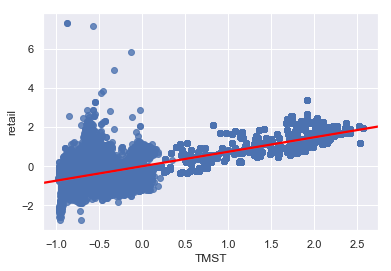

In [23]:
# 유동인구와 유통 매출지수 상관관계 시각화
sns.regplot(x=rawdata1['TMST'], y=rawdata1['retail'],line_kws={'color': 'red'})

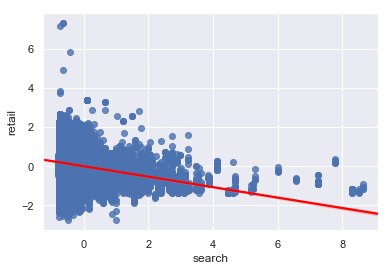

In [24]:
# 검색률과 유통 매출지수 상관관계 시각화
sns.regplot(x=rawdata1['search'], y=rawdata1['retail'],line_kws={'color': 'red'})

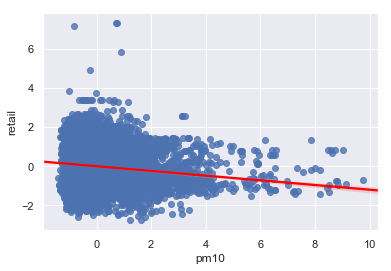

In [25]:
# 미세먼지와 유통 매출지수 상관관계 시각화
sns.regplot(x=rawdata1['pm10'], y=rawdata1['retail'],line_kws={'color': 'red'})

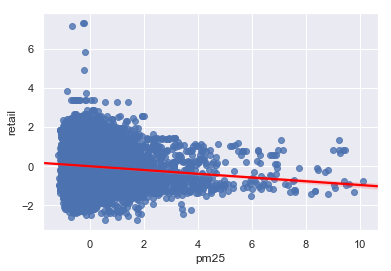

In [26]:
# 초미세먼지와 유통 매출지수 상관관계 시각화
sns.regplot(x=rawdata1['pm25'], y=rawdata1['retail'],line_kws={'color': 'red'})

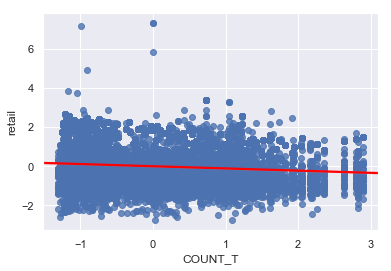

In [27]:
# 뉴스기사 개수와 유통 매출지수 상관관계 시각화
sns.regplot(x=rawdata1['COUNT_T'], y=rawdata1['retail'],line_kws={'color': 'red'})

### 인덱스와의 상관관계

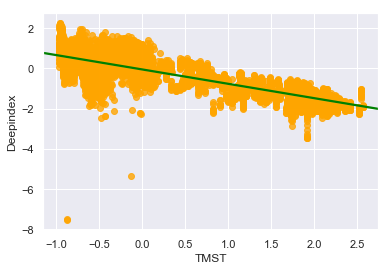

In [28]:
# 유동인구와 인덱스 상관관계 시각화
sns.regplot(x=rawdata1['TMST'], y=rawdata1['Deepindex'],line_kws={'color': 'green'}, scatter_kws={'color': 'orange'})

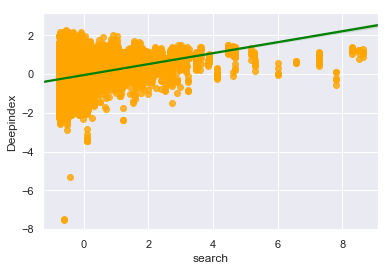

In [29]:
# 검색률과 인덱스 상관관계 시각화
sns.regplot(x=rawdata1['search'], y=rawdata1['Deepindex'],line_kws={'color': 'green'}, scatter_kws={'color': 'orange'})

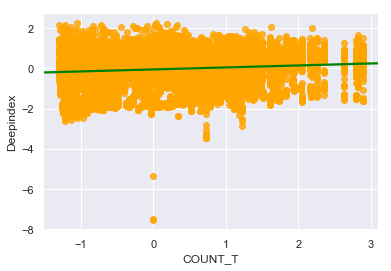

In [30]:
# 뉴스기사 개수와 인덱스 상관관계 시각화
sns.regplot(x=rawdata1['COUNT_T'], y=rawdata1['Deepindex'],line_kws={'color': 'green'}, scatter_kws={'color': 'orange'})

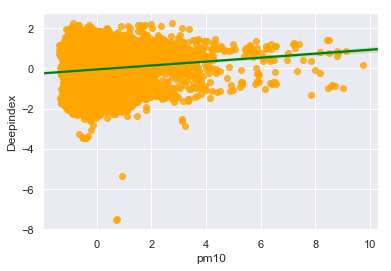

In [31]:
# 미세먼지와 인덱스 상관관계 시각화
sns.regplot(x=rawdata1['pm10'], y=rawdata1['Deepindex'],line_kws={'color': 'green'}, scatter_kws={'color': 'orange'})

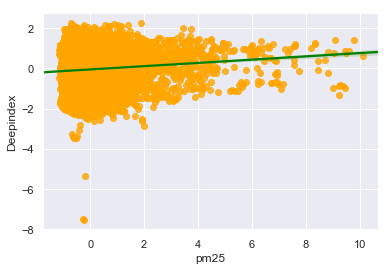

In [32]:
# 초미세먼지와 인덱스 상관관계 시각화
sns.regplot(x=rawdata1['pm25'], y=rawdata1['Deepindex'],line_kws={'color': 'green'}, scatter_kws={'color': 'orange'})

# 동별 인덱스 정리

In [33]:
# 동별로 정규화 후 모델 실행시켜 각각 Deepindex 추가하기

for name in filenames:
    a = pd.read_csv('../data/total2/'+name)
    
    b = (a-a.mean())/a.std()
    x = b[['pm10','pm25','COUNT_T','TMST','search']]
    
    a['Deepindex'] = model2.predict(x)
    
    a.to_csv('../data/totaldeep/'+name,index=False)